In [51]:
import datetime

from numpy import ndarray
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [3]:
car_dataset=pd.read_csv('Car Dataset.csv')

In [5]:
print(car_dataset.head())

   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \

In [7]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [8]:
car_dataset.shape

(205, 26)

In [9]:
#checking missing values
car_dataset.isnull().sum()

car_ID 0
symboling 0
CarName 0
fueltype 0
aspiration 0
doornumber 0
carbody 0
drivewheel 0
enginelocation 0
wheelbase 0
carlength 0
carwidth 0
carheight 0
curbweight 0
enginetype 0
cylindernumber 0
enginesize 0
fuelsystem 0
boreratio 0
stroke 0
compressionratio 0
horsepower 0
peakrpm 0
citympg 0
highwaympg 0
price 0
dtype: int64

In [10]:
# replace missing values if present
#checking the distribution of categorial data
print(car_dataset.CarName.value_counts())

toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: CarName, Length: 147, dtype: int64


In [11]:
print(car_dataset.aspiration.value_counts())

std      168
turbo     37
Name: aspiration, dtype: int64


In [12]:
print(car_dataset.carbody.value_counts())

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64


In [13]:
print(car_dataset.CarName)

0            alfa-romero giulia
1           alfa-romero stelvio
2      alfa-romero Quadrifoglio
3                   audi 100 ls
4                    audi 100ls
                 ...           
200             volvo 145e (sw)
201                 volvo 144ea
202                 volvo 244dl
203                   volvo 246
204                 volvo 264gl
Name: CarName, Length: 205, dtype: object


In [14]:
print(car_dataset.enginelocation.value_counts())

front    202
rear       3
Name: enginelocation, dtype: int64


In [15]:
print(car_dataset.drivewheel.value_counts())

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64


In [16]:
print(car_dataset.fuelsystem.value_counts())

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64


In [17]:
print(car_dataset.enginetype.value_counts())

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64


In [18]:
car_dataset.replace({'fueltype':{'gas':0,'diesel':1,'petrol':2}},inplace=True)
car_dataset.replace({'carbody':{'sedan':0,'hatchback':1,'wagon':2,'hardtop':3,'convertible':4}},inplace=True)
car_dataset.replace({'aspiration':{'std':0,'turbo':1}},inplace=True)
car_dataset.replace({'drivewheel':{'fwd':0,'rwd':1,'4wd':2}},inplace=True)
car_dataset.replace({'enginelocation':{'front':0,'rear':1}},inplace=True)
car_dataset.replace({'fuelsystem':{'mpfi':0,'2bbl':1,'idi':2,'1bbl':3,'spdi':4,'4bbl':5,'mfi':6,'spfi':7}},inplace=True)
car_dataset.replace({'enginetype':{'ohc':0,'ohcf':1,'ohcv':2,'dohc':3,'l':4,'rotor':5,'dohcv':6}},inplace=True)

In [19]:
car_dataset.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,0,0,two,4,1,0,88.6,...,130,0,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,0,0,two,4,1,0,88.6,...,130,0,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,0,0,two,1,1,0,94.5,...,152,0,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,0,0,four,0,0,0,99.8,...,109,0,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,0,0,four,0,2,0,99.4,...,136,0,3.19,3.40,8.0,115,5500,18,22,17450.0


0 185
1 20
Name: fueltype, dtype: int64

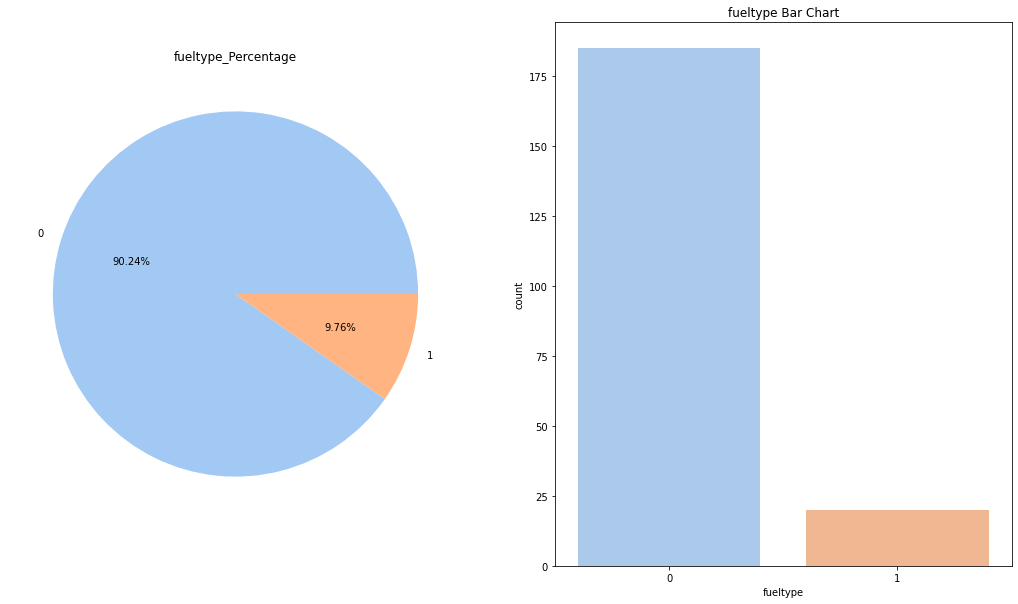

In [102]:
#fueltype
colors=sns.color_palette('pastel')
labels=car_dataset['fueltype'].dropna().unique()
plt.figure(figsize=(18,10))
plt.subplot(1,2,1)
plt.title('fueltype_Percentage')
plt.pie(car_dataset['fueltype'].value_counts(),labels=labels,colors=colors,autopct='%.2f%%')
plt.subplot(1,2,2)
plt.title('fueltype Bar Chart')
sns.countplot(x="fueltype",data=car_dataset,palette=colors)
car_dataset.fueltype.value_counts(dropna=False)

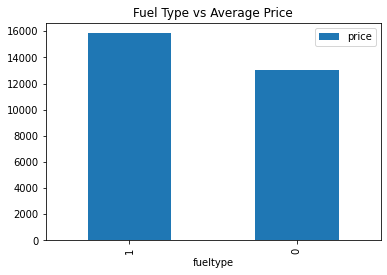

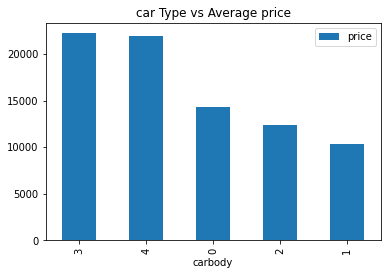

In [103]:
df=pd.DataFrame(car_dataset.groupby(["fueltype"])['price'].mean().sort_values(ascending=False))
df.plot.bar()
plt.title("Fuel Type vs Average Price")
plt.show()
df=pd.DataFrame(car_dataset.groupby(["carbody"])["price"].mean().sort_values(ascending=False))
df.plot.bar()
plt.title('car Type vs Average price')
plt.show()

In [105]:
predict="price"
data=car_dataset[["symboling","wheelbase","carwidth","carheight","curbweight","boreratio","stroke","compressionratio","horsepower","peakrpm","citympg","highwaympg","price"]]
           
x: =np.array(data.drop([predict],1))
y=np.array(data[predict])

<ipython-input-105-621a1ce144b6>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x=np.array(data.drop([predict],1))


In [106]:
print(x)
print(y)

[[ 3.000e+00  8.860e+01  6.410e+01 ...  5.000e+03  2.100e+01  2.700e+01]
 [ 3.000e+00  8.860e+01  6.410e+01 ...  5.000e+03  2.100e+01  2.700e+01]
 [ 1.000e+00  9.450e+01  6.550e+01 ...  5.000e+03  1.900e+01  2.600e+01]
 ...
 [-1.000e+00  1.091e+02  6.890e+01 ...  5.500e+03  1.800e+01  2.300e+01]
 [-1.000e+00  1.091e+02  6.890e+01 ...  4.800e+03  2.600e+01  2.700e+01]
 [-1.000e+00  1.091e+02  6.890e+01 ...  5.400e+03  1.900e+01  2.500e+01]]
[13495.    16500.    16500.    13950.    17450.    15250.    17710.
 18920.    23875.    17859.167 16430.    16925.    20970.    21105.
 24565.    30760.    41315.    36880.     5151.     6295.     6575.
  5572.     6377.     7957.     6229.     6692.     7609.     8558.
  8921.    12964.     6479.     6855.     5399.     6529.     7129.
  7295.     7295.     7895.     9095.     8845.    10295.    12945.
 10345.     6785.     8916.5    8916.5   11048.    32250.    35550.
 36000.     5195.     6095.     6795.     6695.     7395.    10945.
 11845.    1

In [108]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

In [109]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)
print('training data shape is :{}.'.format(x_train.shape))
print('training label shape is :{}.'.format(y_train.shape))
print('testing data shape is :{}.'.format(x_test.shape))
print('testing label shape is :{}.'.format(y_test.shape))

training data shape is :(164, 12).
training label shape is :(164,).
testing data shape is :(41, 12).
testing label shape is :(41,).


In [119]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor()
regressor.fit(x,y)

RandomForestRegressor() In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook. On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org. RandomForestRegressor RandomForestRegressor()

In [113]:
regressor.score(x_train,y_train)

0.9856617074755313

In [114]:
regressor.score(x_test,y_test)

0.9808456712855288

In [115]:
from sklearn.metrics import accuracy_score
prediction= regressor. predict(x_test)
percentage= regressor.score(x_test,y_test)
percentage

0.9808456712855288

In [116]:
 #check the accuracy on the training set
print(regressor.score(x_train,y_train))
print(f"Test set:{len(x_test)}")
print(f"Accuracy={percentage*100}%")
    

0.9856617074755313
Test set:41
Accuracy=98.08456712855288%


In [ ]:
#linear regression loading
lin_reg_model=LinearRegression()
#fit is used to train our model
lin_reg_model.fit(X_train,Y_train)